In [1]:
import pytest
import numpy as np
import finite
import timesteppers
import equations
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()

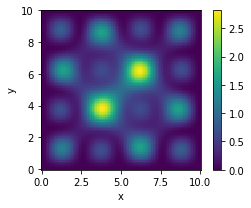

In [2]:
resolution = 100
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()


IC = np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10)
c = IC.astype(complex)

diff = equations.SchrodingerBCLinear(c,2, domain)

alpha = 0.2
dt = alpha*grid_y.dx
n=0
cadence = 10
xm, ym  = np.meshgrid(x, y)
while diff.t < 5 - 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)

(100, 100)

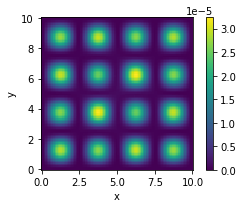

In [3]:
t = 5
x, y = domain.values()
sol = np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)*np.exp(-1j*np.pi**2/100*t)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10)*np.exp(-1j*16*np.pi**2/100*t)
data2 = abs(sol)**2
plot_2D_field(xm,ym,abs(sol-c)**2)
np.shape(sol)


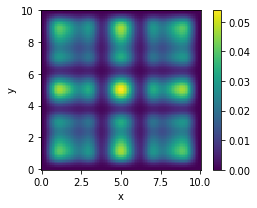

In [4]:
resolution = 100
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()


IC = np.exp(-(x-5)**2)*np.exp(-(y-5)**2)*np.exp(1j)
c = IC.astype(complex)

diff = equations.SchrodingerBCNonLinear(c,2,2, domain)

alpha = 0.2
dt = alpha*grid_y.dx
n=0
cadence = 5
xm, ym  = np.meshgrid(x, y)
while diff.t < 5 - 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)

(200, 200)

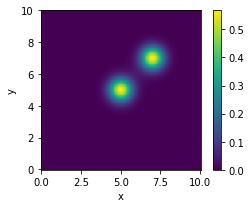

In [28]:
t = 200
x, y = domain.values()
sol = (np.exp(-(x-5)**2)*np.exp(-(y-5)**2)*np.cos(10*t)/np.cosh(1j*t) + np.exp(-(x-7)**2)*np.exp(-(y-7)**2)*np.cos(10*t)/np.cosh(1j*t))
plot_2D_field(xm,ym,abs(sol)**2)
np.shape(sol)
